# SI 330: Data Manipulation
## Project - Do Video Games Cause Violence?
### Gavin Ryba, School of Information, University of Michigan

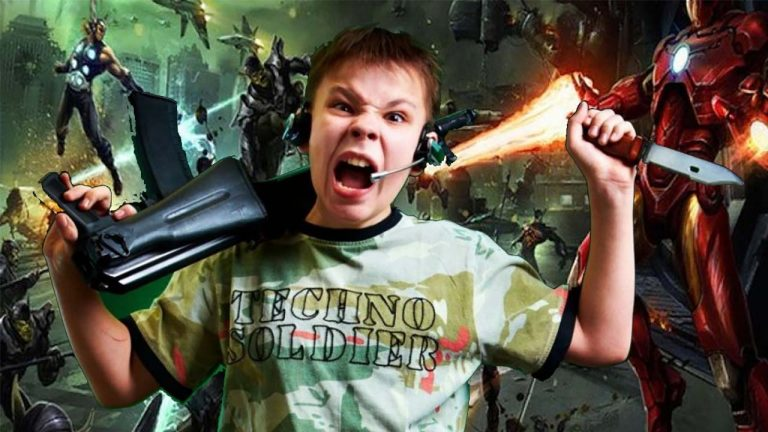

In [373]:
from IPython.display import Image
Image('https://twomag.com/wp-content/uploads/2020/05/violent-video-games.jpg')

In [374]:
import pandas as pd
from pandas import Series
import nltk
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt

In [375]:
video_games = pd.read_csv('game_info.csv')
video_games.head()

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,West Coast Software,Adventure||Puzzle,West Coast Software,Everyone 10+,4,88,2,2,0,0
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,...,Soma Games,Simulation||Indie,Immanitas Entertainment||Code-Monkeys,Everyone,2,42,2,0,0,0
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,Prettygreat Pty,Adventure||Arcade,Prettygreat Pty,Everyone 10+,0,2,2,0,1,0
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,Oasis Games||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0,1,0,0,0,0
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,1,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,2,79,0,0,0,0


In [376]:
crime_stuff = json.load(open('crime_info.json'))
crime_df = pd.DataFrame(crime_stuff["results"])
crime_df.head()

,state_id,state_abbr,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson
0,None,,2015,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,44139
1,None,,2000,281421906,1425486,15586,90178.0,NaN,408016,911706,10182584,2050992,6971590,1160002,69467
2,None,,1997,267783607,1636099,18211,96153.0,NaN,498534,1023201,11558975,2461026,7743760,1354189,87332
3,None,,1998,270248003,1533887,16974,93144.0,NaN,447186,976583,10951827,2332735,7376311,1242781,80428
4,None,,1999,272690813,1426044,15522,89411.0,NaN,409371,911740,10208334,2100739,6955520,1152075,78498


In [390]:
#video_games['genres_split'] = video_games['genres'].str.replace('|', '#').str.split('##')
#video_games.head()

In [379]:
adult_games = video_games.loc[(video_games['esrb_rating'] == 'Mature') | (video_games['esrb_rating'] == 'Adults Only')]
adult_games

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genres_split
85,10008,sudden-strike-4,Sudden Strike 4,77.0,2017-08-10,False,2019-10-22T14:21:49,http://www.kalypsomedia.com/,3.12,4,...,Action||Strategy,Kalypso Media||Kalypso,Mature,64,603,3,6,13,4,"[Action, Strategy]"
207,10020,arizona-sunshine,Arizona Sunshine,81.0,2016-12-06,False,2020-06-26T22:22:00,http://www.arizona-sunshine.com,3.76,4,...,Action||Adventure||Indie,Vertigo Games,Adults Only,13,294,23,8,17,2,"[Action, Adventure, Indie]"
359,10035,hitman,HITMAN,83.0,2017-11-16,False,2019-11-29T18:09:04,http://www.Hitman.com/,3.92,4,...,Action||Shooter,Square Enix||Feral Interactive||Warner Bros. I...,Adults Only,533,5134,656,251,440,112,"[Action, Shooter]"
446,10043,serious-sam-vr-the-second-encounter,Serious Sam VR: The Second Encounter,NaN,2017-04-04,False,2020-09-17T06:05:15,http://www.croteam.com,3.67,5,...,Action||Indie,Devolver Digital||Croteam,Mature,10,105,2,1,4,0,"[Action, Indie]"
510,10049,hitman-codename-47,Hitman: Codename 47,73.0,2000-11-19,False,2019-09-17T03:24:29,https://www.ioi.dk/hitman-codename-47/,3.87,4,...,Action||Shooter,Square Enix||Eidos Interactive,Mature,116,1941,300,22,114,9,"[Action, Shooter]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472735,9840,we-happy-few,We Happy Few,64.0,2018-08-09,False,2020-05-02T19:25:36,http://compulsiongames.com/en/10/we-happy-few,3.13,3,...,Action||Adventure||Indie,Microsoft Studios||Gearbox Publishing||Compuls...,Mature,61,677,40,90,127,26,"[Action, Adventure, Indie]"
473019,9867,rick-and-morty-virtual-rick-ality,Rick and Morty: Virtual Rick-ality,NaN,2017-04-20,False,2019-09-17T09:57:06,http://www.adultswim.com/games/pc-console/rick...,3.71,4,...,Adventure||Simulation||Indie,Adult Swim Games,Mature,5,192,19,8,7,6,"[Adventure, Simulation, Indie]"
473268,9891,friday-the-13th-the-game,Friday the 13th: The Game,61.0,2017-05-25,False,2019-09-17T05:12:01,http://www.f13game.com,3.11,3,...,Action||Adventure,Gun Media,Mature,40,639,26,16,107,14,"[Action, Adventure]"
473557,9919,just-ignore-them,Just Ignore Them,NaN,2017-04-28,False,2019-11-19T19:21:05,http://www.facebook.com/strangagames/,3.00,3,...,Adventure||Indie,GrabTheGames||Ratalaika Games,Mature,3,83,3,0,1,0,"[Adventure, Indie]"


In [380]:
adult_games['released'] = pd.to_datetime(adult_games['released']).copy()
adult_games['release_year'] = adult_games['released'].dt.year
adult_games

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genres_split,release_year
85,10008,sudden-strike-4,Sudden Strike 4,77.0,2017-08-10,False,2019-10-22T14:21:49,http://www.kalypsomedia.com/,3.12,4,...,Kalypso Media||Kalypso,Mature,64,603,3,6,13,4,"[Action, Strategy]",2017.0
207,10020,arizona-sunshine,Arizona Sunshine,81.0,2016-12-06,False,2020-06-26T22:22:00,http://www.arizona-sunshine.com,3.76,4,...,Vertigo Games,Adults Only,13,294,23,8,17,2,"[Action, Adventure, Indie]",2016.0
359,10035,hitman,HITMAN,83.0,2017-11-16,False,2019-11-29T18:09:04,http://www.Hitman.com/,3.92,4,...,Square Enix||Feral Interactive||Warner Bros. I...,Adults Only,533,5134,656,251,440,112,"[Action, Shooter]",2017.0
446,10043,serious-sam-vr-the-second-encounter,Serious Sam VR: The Second Encounter,NaN,2017-04-04,False,2020-09-17T06:05:15,http://www.croteam.com,3.67,5,...,Devolver Digital||Croteam,Mature,10,105,2,1,4,0,"[Action, Indie]",2017.0
510,10049,hitman-codename-47,Hitman: Codename 47,73.0,2000-11-19,False,2019-09-17T03:24:29,https://www.ioi.dk/hitman-codename-47/,3.87,4,...,Square Enix||Eidos Interactive,Mature,116,1941,300,22,114,9,"[Action, Shooter]",2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472735,9840,we-happy-few,We Happy Few,64.0,2018-08-09,False,2020-05-02T19:25:36,http://compulsiongames.com/en/10/we-happy-few,3.13,3,...,Microsoft Studios||Gearbox Publishing||Compuls...,Mature,61,677,40,90,127,26,"[Action, Adventure, Indie]",2018.0
473019,9867,rick-and-morty-virtual-rick-ality,Rick and Morty: Virtual Rick-ality,NaN,2017-04-20,False,2019-09-17T09:57:06,http://www.adultswim.com/games/pc-console/rick...,3.71,4,...,Adult Swim Games,Mature,5,192,19,8,7,6,"[Adventure, Simulation, Indie]",2017.0
473268,9891,friday-the-13th-the-game,Friday the 13th: The Game,61.0,2017-05-25,False,2019-09-17T05:12:01,http://www.f13game.com,3.11,3,...,Gun Media,Mature,40,639,26,16,107,14,"[Action, Adventure]",2017.0
473557,9919,just-ignore-them,Just Ignore Them,NaN,2017-04-28,False,2019-11-19T19:21:05,http://www.facebook.com/strangagames/,3.00,3,...,GrabTheGames||Ratalaika Games,Mature,3,83,3,0,1,0,"[Adventure, Indie]",2017.0


In [381]:
adult_games = adult_games.dropna(subset = ['release_year'])

In [382]:
adult_games = adult_games.loc[(adult_games['release_year'] >= 1995) & (adult_games['release_year'] <= 2020)]
adult_games

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genres_split,release_year
85,10008,sudden-strike-4,Sudden Strike 4,77.0,2017-08-10,False,2019-10-22T14:21:49,http://www.kalypsomedia.com/,3.12,4,...,Kalypso Media||Kalypso,Mature,64,603,3,6,13,4,"[Action, Strategy]",2017.0
207,10020,arizona-sunshine,Arizona Sunshine,81.0,2016-12-06,False,2020-06-26T22:22:00,http://www.arizona-sunshine.com,3.76,4,...,Vertigo Games,Adults Only,13,294,23,8,17,2,"[Action, Adventure, Indie]",2016.0
359,10035,hitman,HITMAN,83.0,2017-11-16,False,2019-11-29T18:09:04,http://www.Hitman.com/,3.92,4,...,Square Enix||Feral Interactive||Warner Bros. I...,Adults Only,533,5134,656,251,440,112,"[Action, Shooter]",2017.0
446,10043,serious-sam-vr-the-second-encounter,Serious Sam VR: The Second Encounter,NaN,2017-04-04,False,2020-09-17T06:05:15,http://www.croteam.com,3.67,5,...,Devolver Digital||Croteam,Mature,10,105,2,1,4,0,"[Action, Indie]",2017.0
510,10049,hitman-codename-47,Hitman: Codename 47,73.0,2000-11-19,False,2019-09-17T03:24:29,https://www.ioi.dk/hitman-codename-47/,3.87,4,...,Square Enix||Eidos Interactive,Mature,116,1941,300,22,114,9,"[Action, Shooter]",2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472735,9840,we-happy-few,We Happy Few,64.0,2018-08-09,False,2020-05-02T19:25:36,http://compulsiongames.com/en/10/we-happy-few,3.13,3,...,Microsoft Studios||Gearbox Publishing||Compuls...,Mature,61,677,40,90,127,26,"[Action, Adventure, Indie]",2018.0
473019,9867,rick-and-morty-virtual-rick-ality,Rick and Morty: Virtual Rick-ality,NaN,2017-04-20,False,2019-09-17T09:57:06,http://www.adultswim.com/games/pc-console/rick...,3.71,4,...,Adult Swim Games,Mature,5,192,19,8,7,6,"[Adventure, Simulation, Indie]",2017.0
473268,9891,friday-the-13th-the-game,Friday the 13th: The Game,61.0,2017-05-25,False,2019-09-17T05:12:01,http://www.f13game.com,3.11,3,...,Gun Media,Mature,40,639,26,16,107,14,"[Action, Adventure]",2017.0
473557,9919,just-ignore-them,Just Ignore Them,NaN,2017-04-28,False,2019-11-19T19:21:05,http://www.facebook.com/strangagames/,3.00,3,...,GrabTheGames||Ratalaika Games,Mature,3,83,3,0,1,0,"[Adventure, Indie]",2017.0


In [383]:
adult_games.sort_values('release_year', ascending=False)

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genres_split,release_year
417021,511537,last-outlaws,Last Outlaws,NaN,2020-10-11,False,2020-10-30T02:14:45,http://seal.games,0.00,0,...,sealMedia,Mature,0,0,0,0,0,0,"[RPG, Strategy]",2020.0
351877,451629,is-it-love-jake-decisions,Is It Love? Jake - Decisions,NaN,2020-06-02,False,2020-06-08T02:15:14,http://1492.io,0.00,0,...,1492 Studio,Mature,0,0,0,0,0,0,"[RPG, Simulation]",2020.0
328711,430516,valfaris-slain-double-pack,Valfaris & Slain Double Pack,NaN,2020-04-16,False,2020-12-16T15:02:29,NaN,0.00,0,...,Big Sugar,Mature,0,0,0,0,0,0,NaN,2020.0
328632,430443,hentai-girlfriend-simulator,Hentai Girlfriend Simulator,NaN,2020-01-31,False,2020-04-20T04:53:38,NaN,0.00,0,...,Slippy Floor,Adults Only,0,0,0,0,0,0,"[Simulation, Indie]",2020.0
327047,428996,special-ops-2020-team-shooter,Special Ops 2020- Team Shooter,NaN,2020-04-07,False,2020-04-17T07:47:54,NaN,0.00,0,...,Sallie Crocker,Mature,0,0,0,0,0,0,"[RPG, Sports]",2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119942,21285,hexen-for-windows-95,HeXen: Beyond Heretic,NaN,1995-10-30,False,2020-09-14T22:03:03,NaN,3.75,4,...,id Software||GT Interactive Software,Mature,32,529,30,10,26,1,"[Action, Shooter]",1995.0
132677,22776,gabriel-knight-2-the-beast-within,Gabriel Knight 2: The Beast Within,NaN,1995-06-29,False,2019-09-17T11:01:31,NaN,3.59,5,...,Activision Blizzard,Mature,14,101,14,4,1,0,[Adventure],1995.0
132926,22811,crusader-no-remorse,Crusader: No Remorse,NaN,1995-08-30,False,2020-05-14T05:24:12,NaN,3.71,4,...,Electronic Arts,Adults Only,24,88,12,3,17,0,[Action],1995.0
301370,405493,ghostly-desires,Ghostly Desires,NaN,1995-12-31,False,2020-01-20T02:52:09,NaN,0.00,0,...,NaN,Adults Only,1,0,0,0,0,0,[Adventure],1995.0


In [384]:
adult_games['game_count'] = adult_games.groupby(['release_year'])['esrb_rating'].transform('count')
adult_games

,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing,genres_split,release_year,game_count
85,10008,sudden-strike-4,Sudden Strike 4,77.0,2017-08-10,False,2019-10-22T14:21:49,http://www.kalypsomedia.com/,3.12,4,...,Mature,64,603,3,6,13,4,"[Action, Strategy]",2017.0,931
207,10020,arizona-sunshine,Arizona Sunshine,81.0,2016-12-06,False,2020-06-26T22:22:00,http://www.arizona-sunshine.com,3.76,4,...,Adults Only,13,294,23,8,17,2,"[Action, Adventure, Indie]",2016.0,664
359,10035,hitman,HITMAN,83.0,2017-11-16,False,2019-11-29T18:09:04,http://www.Hitman.com/,3.92,4,...,Adults Only,533,5134,656,251,440,112,"[Action, Shooter]",2017.0,931
446,10043,serious-sam-vr-the-second-encounter,Serious Sam VR: The Second Encounter,NaN,2017-04-04,False,2020-09-17T06:05:15,http://www.croteam.com,3.67,5,...,Mature,10,105,2,1,4,0,"[Action, Indie]",2017.0,931
510,10049,hitman-codename-47,Hitman: Codename 47,73.0,2000-11-19,False,2019-09-17T03:24:29,https://www.ioi.dk/hitman-codename-47/,3.87,4,...,Mature,116,1941,300,22,114,9,"[Action, Shooter]",2000.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472735,9840,we-happy-few,We Happy Few,64.0,2018-08-09,False,2020-05-02T19:25:36,http://compulsiongames.com/en/10/we-happy-few,3.13,3,...,Mature,61,677,40,90,127,26,"[Action, Adventure, Indie]",2018.0,996
473019,9867,rick-and-morty-virtual-rick-ality,Rick and Morty: Virtual Rick-ality,NaN,2017-04-20,False,2019-09-17T09:57:06,http://www.adultswim.com/games/pc-console/rick...,3.71,4,...,Mature,5,192,19,8,7,6,"[Adventure, Simulation, Indie]",2017.0,931
473268,9891,friday-the-13th-the-game,Friday the 13th: The Game,61.0,2017-05-25,False,2019-09-17T05:12:01,http://www.f13game.com,3.11,3,...,Mature,40,639,26,16,107,14,"[Action, Adventure]",2017.0,931
473557,9919,just-ignore-them,Just Ignore Them,NaN,2017-04-28,False,2019-11-19T19:21:05,http://www.facebook.com/strangagames/,3.00,3,...,Mature,3,83,3,0,1,0,"[Adventure, Indie]",2017.0,931


In [385]:
crime_df['violent_crime_proportion'] = (crime_df['violent_crime']/crime_df['population'])
crime_df['homicide_proportion'] = (crime_df['homicide']/crime_df['population'])
crime_df['aggravated_assault_proportion'] = (crime_df['aggravated_assault']/crime_df['population'])
crime_df['arson_proportion'] = (crime_df['arson']/crime_df['population'])
crime_df

,state_id,state_abbr,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,violent_crime_proportion,homicide_proportion,aggravated_assault_proportion,arson_proportion
0,None,,2015,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,44139,0.003737,0.000049,0.002381,0.000138
1,None,,2000,281421906,1425486,15586,90178.0,NaN,408016,911706,10182584,2050992,6971590,1160002,69467,0.005065,0.000055,0.003240,0.000247
2,None,,1997,267783607,1636099,18211,96153.0,NaN,498534,1023201,11558975,2461026,7743760,1354189,87332,0.006110,0.000068,0.003821,0.000326
3,None,,1998,270248003,1533887,16974,93144.0,NaN,447186,976583,10951827,2332735,7376311,1242781,80428,0.005676,0.000063,0.003614,0.000298
4,None,,1999,272690813,1426044,15522,89411.0,NaN,409371,911740,10208334,2100739,6955520,1152075,78498,0.005230,0.000057,0.003343,0.000288
5,None,,2001,285317559,1439480,16037,90863.0,NaN,423557,909023,10437189,2116531,7092267,1228391,79040,0.005045,0.000056,0.003186,0.000277
6,None,,2002,287973924,1423677,16229,95235.0,NaN,420806,891407,10455277,2151252,7057379,1246646,77149,0.004944,0.000056,0.003095,0.000268
7,None,,2003,290788976,1383676,16528,93883.0,NaN,414235,859030,10442862,2154834,7026802,1261226,72812,0.004758,0.000057,0.002954,0.000250
8,None,,2004,293656842,1360088,16148,95089.0,NaN,401470,847381,10319386,2144446,6937089,1237851,69305,0.004632,0.000055,0.002886,0.000236
9,None,,2005,296507061,1390745,16740,94347.0,NaN,417438,862220,10174754,2155448,6783447,1235859,68514,0.004690,0.000056,0.002908,0.000231


In [386]:
crime_df.sort_values('year', ascending=False)

,state_id,state_abbr,year,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,arson,violent_crime_proportion,homicide_proportion,aggravated_assault_proportion,arson_proportion
25,None,None,2020,329484123,1313105,21570,NaN,126430.0,243600,921505,6452038,1035314,4606324,810400,43602,0.003985,0.000065,0.002797,0.000132
24,None,None,2019,328329953,1250393,16669,NaN,143224.0,268483,822017,6995235,1118096,5152267,724872,35919,0.003808,0.000051,0.002504,0.000109
23,None,None,2018,326687501,1252399,16374,NaN,143765.0,281278,810982,7219084,1235013,5232167,751904,39367,0.003834,0.000050,0.002482,0.000121
16,None,None,2017,325147121,1283875,17294,NaN,135666.0,320596,810319,7682988,1397045,5513000,772943,42990,0.003949,0.000053,0.002492,0.000132
22,None,,2016,323405935,1285606,17413,96970.0,132414.0,332797,802982,7928530,1516405,5644835,767290,45927,0.003975,0.000054,0.002483,0.000142
0,None,,2015,320896618,1199310,15883,91261.0,126134.0,328109,764057,8024115,1587564,5723488,713063,44139,0.003737,0.000049,0.002381,0.000138
19,None,,2014,318907401,1153022,14164,84864.0,118027.0,322905,731089,8209010,1713153,5809054,686803,46282,0.003616,0.000044,0.002292,0.000145
18,None,,2013,316497531,1168298,14319,82109.0,113695.0,345093,726777,8651892,1932139,6019465,700288,47267,0.003691,0.000045,0.002296,0.000149
17,None,,2012,313873685,1217057,14856,85141.0,NaN,355051,762009,9001992,2109932,6168874,723186,55394,0.003878,0.000047,0.002428,0.000176
15,None,,2011,311587816,1206031,14661,84175.0,NaN,354772,752423,9052743,2185140,6151095,716508,54565,0.003871,0.000047,0.002415,0.000175


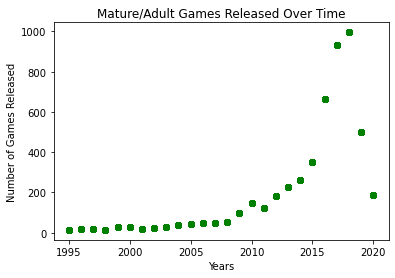

In [395]:
plt.plot(adult_games['release_year'], adult_games['game_count'], marker='o', linestyle = '', color='g')
plt.title('Mature/Adult Games Released Over Time')
plt.ylabel('Number of Games Released')
plt.xlabel('Years')
plt.show()

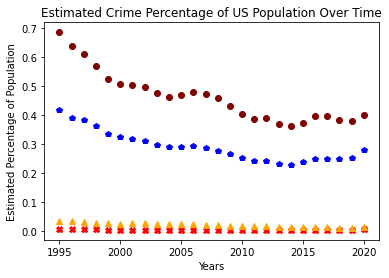

In [396]:
plt.title('Estimated Crime Percentage of US Population Over Time')
plt.ylabel('Estimated Percentage of Population')
plt.xlabel('Years')
plt.plot(crime_df['year'], crime_df['violent_crime_proportion'] * 100, marker='o', linestyle = '', color='maroon')
plt.plot(crime_df['year'], crime_df['homicide_proportion'] * 100, marker='X', linestyle = '', color='r')
plt.plot(crime_df['year'], crime_df['aggravated_assault_proportion'] * 100, marker='p', linestyle = '', color='b')
plt.plot(crime_df['year'], crime_df['arson_proportion'] * 100, marker='^', linestyle = '', color='orange')
plt.show()

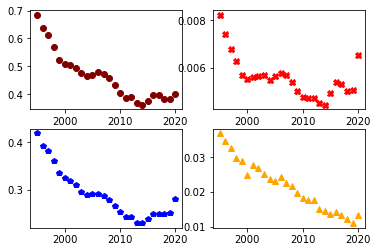

In [397]:
g, ((bx1, bx2),(bx3,bx4)) = plt.subplots(2,2)
bx1.plot(crime_df['year'], crime_df['violent_crime_proportion'] * 100, marker='o', linestyle = '', color='maroon')
bx2.plot(crime_df['year'], crime_df['homicide_proportion'] * 100, marker='X', linestyle = '', color='r')
bx3.plot(crime_df['year'], crime_df['aggravated_assault_proportion'] * 100, marker='p', linestyle = '', color='b')
bx4.plot(crime_df['year'], crime_df['arson_proportion'] * 100, marker='^', linestyle = '', color='orange')
plt.show()